In [0]:
%tensorflow_version 1.x

In [2]:
# 1. 모듈 import
import os, numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [4]:
# 2. npy 데이터를 불러와서 모델 학습
X_train, X_test, y_train, y_test = np.load("/content/drive/My Drive/fin.npy", allow_pickle=True)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')  
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}') 


X_train: (28810, 64, 64, 3), y_train: (28810, 5)
X_test: (7203, 64, 64, 3), y_test: (7203, 5)


In [5]:
# 4. CNN 모델 구성
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), strides=(1, 1), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         


In [6]:
# 4. 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# 5. 모델 학습
model_dir = "./model"
if not os.path.exists(model_dir):
  os.mkdir(model_dir)
model_path = model_dir + '/test.model'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
hist = model.fit(X_train, y_train, epochs=150, batch_size=100, validation_split=0.2, callbacks=[checkpoint, early_stopping])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 23048 samples, validate on 5762 samples
Epoch 1/150





23048/23048 [==============================] - 21s 910us/step - loss: 1.1062 - acc: 0.5409 - val_loss: 0.7413 - val_acc: 0.7143

Epoch 00001: val_loss improved from inf to 0.74129, saving model to ./model/test.model
Epoch 2/150
23048/23048 [==============================] - 6s 268us/step - loss: 0.6926 - acc: 0.7347 - val_loss: 0.5713 - val_acc: 0.7789

Epoch 00002: val_loss improved from 0.74129 to 0.57131, saving model to ./model/test.model
Epoch 3/150
23048/23048 [==============================] - 6s 262us/step - loss: 0.5847 - acc: 0.7735 - val_loss: 0.4918 - val_acc: 0.8084

Epoch 00003: val_loss improved from 0.57131 to 0.49178, saving model to ./model/test.model
Epoch 4/150
23048/23048 [==============================] - 6s 261us/step - loss: 0.4990 - acc: 0.8059 - val_loss: 0.4541 - val_acc: 0.8277

Epoch 00004: val_lo

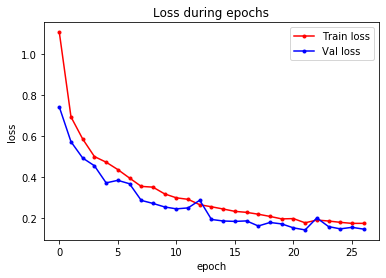

In [8]:
# loss 그래프
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

x = range(len(train_loss))
plt.plot(x, train_loss, marker='.', color='red', label='Train loss')
plt.plot(x, val_loss, marker='.', color='blue', label='Val loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss during epochs')
plt.show()

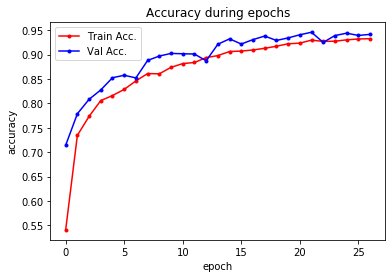

In [9]:
# acc 그래프
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(x, train_acc, marker='.', c='red', label='Train Acc.')
plt.plot(x, val_acc, marker='.', c='blue', label='Val Acc.')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy during epochs')
plt.show()


In [10]:
# Test set으로 모델 평가
score = model.evaluate(X_test, y_test, verbose=0)
print('Training loss:', score[0])
print('Training accuracy: ', score[1])

Training loss: 0.1531414191714264
Training accuracy:  0.9393308343828412


In [0]:
# 모델 저장하기
from keras.models import load_model
model.save('cnn_fin.h5')

In [12]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report
test_true = np.argmax(y_test, axis=1)
print(test_true)
test_pred = np.argmax(model.predict(X_test), axis=1)
print(test_pred)

cm = confusion_matrix(test_true, test_pred)
print(cm)

[3 1 2 ... 2 1 0]
[3 1 2 ... 3 1 0]
[[1407    2    7   16    8]
 [   6 1360    5    1    5]
 [   7   13 1132  240    3]
 [  67    2   45 1400    4]
 [   4    1    0    1 1467]]


In [13]:
# Classification Report
from sklearn.metrics import classification_report
report = classification_report(test_true, test_pred, target_names=os.listdir('/content/drive/My Drive/Final'))
print(report)

              precision    recall  f1-score   support

       nevus       0.94      0.98      0.96      1440
          df       0.99      0.99      0.99      1377
      eschar       0.95      0.81      0.88      1395
          vl       0.84      0.92      0.88      1518
         mel       0.99      1.00      0.99      1473

    accuracy                           0.94      7203
   macro avg       0.94      0.94      0.94      7203
weighted avg       0.94      0.94      0.94      7203

